In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
from scipy import linalg as LA
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("darkgrid")

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fitting noisy data by an affine subspace

## Synthetic sampling

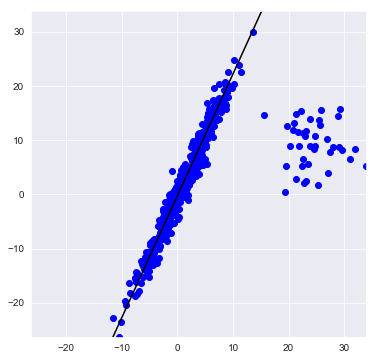

In [9]:
mpl.rcParams['figure.figsize'] = (6,6)

######## INLIERS DISTRIBUTION PARAMS
N = 500  # number of inliers 
mu1, mu2 = 1, 2
sigma1, sigma2 = 4, 9
rho = 0.98

######## OUTLIERS DISTRIBUTION PARAMS
N_out = 40  # number of outliers
mu1_out, mu2_out = 25, 10
sigma1_out, sigma2_out = 4, 4

A = sample_mvn2D(mu1, mu2, sigma1, sigma2, rho, N)
A_noise = sample_mvn2D(mu1_out, mu2_out, sigma1_out, sigma2_out, N=N_out)

A = np.vstack((A, A_noise))

s = sigma2 / sigma1
intercept = mu2 - mu1 * s
f_true = lambda x: s * x + intercept # y - slope * x - intercept = 0

draw_func(f_true, xlmin=A.min(), xlmax=A.max())
visualize2D(A)
plt.show()

## SVD

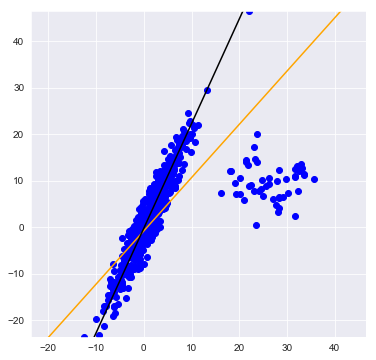

In [18]:
mpl.rcParams['figure.figsize'] = (6,6)

s_PCA, intercept_PCA = PCA_fit(A)
f_pred = lambda x: s_PCA * x + intercept_PCA # y - slope * x - intercept = 0
draw_func(f_pred, xlmin=A.min(), xlmax=A.max(), color='orange')
draw_func(f_true, xlmin=A.min(), xlmax=A.max())
visualize2D(A)
plt.show()

## RPCA

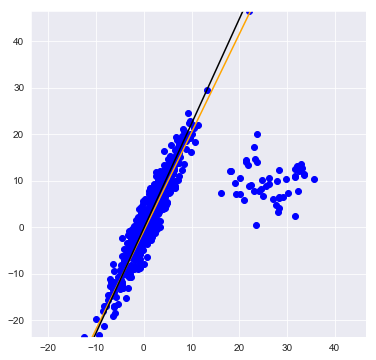

In [15]:
mpl.rcParams['figure.figsize'] = (6,6)

### PARAMS
mu = 0.01
lmbda = 0.1
##########
s_RPCA, intercept_RPCA = RPCA_fit(A, lmbda=lmbda)
f_pred = lambda x: s_RPCA * x + intercept_RPCA # y - slope * x - intercept = 0
draw_func(f_pred, xlmin=A.min(), xlmax=A.max(), color='orange')
draw_func(f_true, xlmin=A.min(), xlmax=A.max())
visualize2D(A)
plt.show()

## ROSL

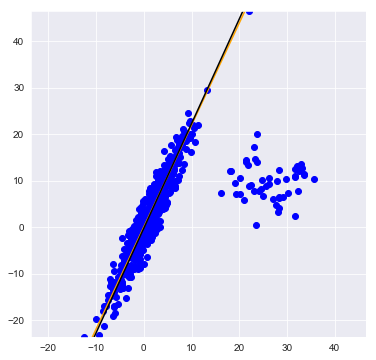

In [17]:
mpl.rcParams['figure.figsize'] = (6,6)

### PARAMS
k = 1
reg = 1
tol = 1e-6
iters = 500
##########

s_ROSL, intercept_ROSL = ROSL_fit(A, k=k, reg=reg, tol=tol, iters=iters)
f_pred = lambda x: s_ROSL * x + intercept_ROSL # y - slope * x - intercept = 0
draw_func(f_pred, xlmin=A.min(), xlmax=A.max(), color='orange')
draw_func(f_true, xlmin=A.min(), xlmax=A.max())
visualize2D(A)
plt.show()

RPCA params: mu = 0.010, lambda = 0.100


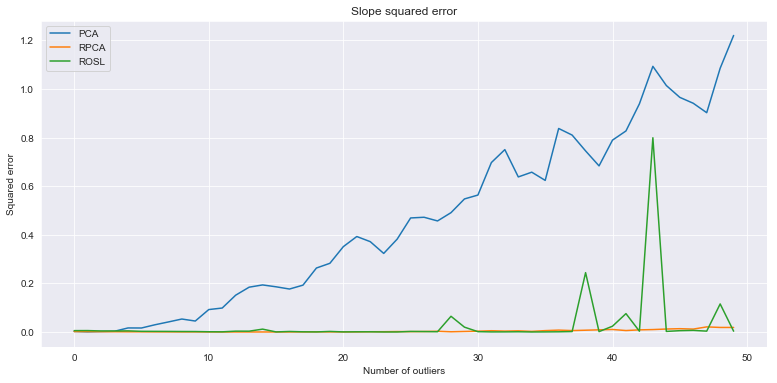

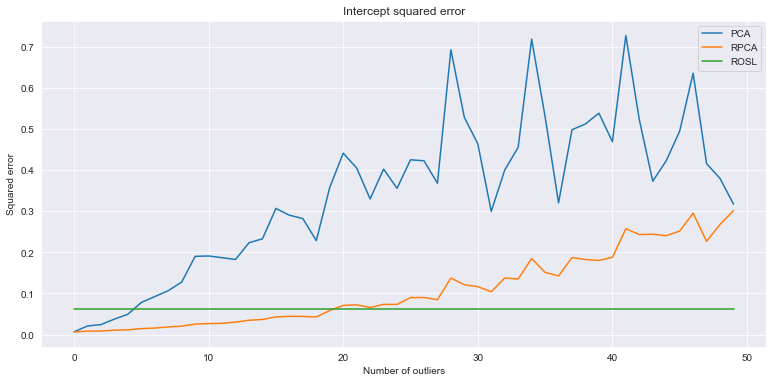

In [14]:
######## INLIERS DISTRIBUTION PARAMS
N = 500  # number of inliers 
mu1, mu2 = 1, 2
sigma1, sigma2 = 4, 9
rho = 0.95

######## OUTLIERS DISTRIBUTION PARAMS
Ns_out = np.arange(50)
mu1_out, mu2_out = 25, 10
sigma1_out, sigma2_out = 4, 4

sqr_errors_PCA = []
sqr_errors_RPCA = []
sqr_errors_ROSL = []

A0 = sample_mvn2D(mu1, mu2, sigma1, sigma2, rho, N)

### RPCA PARAMS
# mu = np.prod(A0.shape) / (4 * np.sum(np.power(A0, 2)))
mu = 0.01
lmbda = 0.1
###############
### ROSL PARAMS
k = 1
reg = 1
tol = 1e-6
iters = 500
###############
print('RPCA params: mu = {:.3f}, lambda = {:.3f}'.format(mu, lmbda))
for N_out in Ns_out:
    A_noise = sample_mvn2D(mu1_out, mu2_out, sigma1_out, sigma2_out, N=N_out)
    A = np.vstack((A0, A_noise))
    s_PCA, intercept_PCA = PCA_fit(A)
    s_RPCA, intercept_RPCA = RPCA_fit(A, mu=mu, lmbda=lmbda)
    s_ROSL, intercept_ROSL = ROSL_fit(A)
    sqr_errors_PCA.append(errors(s, intercept, s_PCA, intercept_PCA, 'sqr'))
    sqr_errors_RPCA.append(errors(s, intercept, s_RPCA, intercept_RPCA, 'sqr'))
    sqr_errors_ROSL.append(errors(s, intercept, s_ROSL, intercept_ROSL, 'sqr'))
sqr_errors_PCA = np.array(sqr_errors_PCA)
sqr_errors_RPCA = np.array(sqr_errors_RPCA)
sqr_errors_ROSL = np.array(sqr_errors_ROSL)

mpl.rcParams['figure.figsize'] = (13,6)

plt.title('Slope squared error')
plt.plot(Ns_out, sqr_errors_PCA[:,0])
plt.plot(Ns_out, sqr_errors_RPCA[:,0])
plt.plot(Ns_out, sqr_errors_ROSL[:,0])
plt.legend(['PCA', 'RPCA', 'ROSL'])
plt.xlabel('Number of outliers')
plt.ylabel('Squared error')
plt.show()

plt.title('Intercept squared error')
plt.plot(Ns_out, sqr_errors_PCA[:,1])
plt.plot(Ns_out, sqr_errors_RPCA[:,1])
plt.plot(Ns_out, sqr_errors_ROSL[:,1])
plt.legend(['PCA', 'RPCA', 'ROSL'])
plt.xlabel('Number of outliers')
plt.ylabel('Squared error')
plt.show()